# Autocorrelation analysis for different observables
Sept 12, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
%matplotlib notebook

In [2]:
import glob,sys, subprocess

In [3]:
import pandas as pd
import gvar as gv

## Autocorrelation formula:
## $$ C(X_i, X_{i+t}) = \langle (X_i - \langle X_i \rangle ) (X_{i+t} - \langle X_{i+t} \rangle )  \rangle$$ 

In [128]:
a1=np.array([np.random.normal(i,0.05,100) for i in range(1,16,4)]).flatten()

# a1=np.random.normal(1,0.05,25)
print(a1)
lgth=len(a1)

[ 0.98469819  1.02874276  1.05210228  0.97889744  0.9300094   1.07032388
  1.02349995  1.03985246  0.9012446   1.00435312  1.00656693  0.96123742
  0.9758355   1.03925593  0.98394849  1.02506052  1.04424677  1.04506927
  1.06741304  0.94620863  1.03368811  1.05548467  1.04941571  0.95281748
  0.91863468  0.91345363  1.0156412   0.95631645  0.90339269  1.01120771
  1.00202832  1.01619376  0.98344894  0.99044652  0.88996734  0.93356837
  0.98293793  1.03247817  0.95749978  1.02089992  1.03671381  1.05898195
  1.00461291  1.01327039  0.9584822   0.96313198  0.99049101  1.08471001
  0.98917564  1.01236859  1.02132262  0.97309772  0.99936921  1.00395294
  0.98913488  1.06523499  0.99355363  0.97279224  0.97002214  0.98020503
  0.96877079  1.01859295  1.01833311  0.97281595  1.03521905  1.03099114
  1.00251343  0.88700734  0.93297698  0.92414823  0.99682943  1.00815217
  1.09879719  0.95465424  0.99716733  0.93355844  1.07410863  1.01153452
  0.91853243  0.97127946  0.96657058  1.03561591  1

In [142]:
def f_autocorr(a1):
    ''' 
    Compute the autocorrelation function of a given 1D array
    '''
    
    lgth=len(a1)
    auto_corr=np.ones(lgth-1,dtype=np.float64)
    
    avg=np.average(a1)
    var=np.var(a1)
    
    a2=a1-avg

    for t in range(0,lgth-1):
#         auto_corr[t] = (np.average([(a1[i]*a1[i+t]) for i in range(lgth-t)])-avg**2)/var
        auto_corr[t] = (np.sum([(a2[i]*a2[i+t]) for i in range(lgth-t)]))/(var*lgth)
#         print(t,np.average([(a1[i]*a1[i+t]) for i in range(lgth-t)]),avg**2)
        
    return auto_corr


def f_autocorr_time(auto_corr):
    
    ## Autocorrelation time as 1/e of 0th value
    for count,i in enumerate(auto_corr):
        if i < (1.0/np.e):
#             print("Autocorr",count,i)
            return count

    print("Error: Autocorr doesn't drop to 1/e")
    return np.inf


<IPython.core.display.Javascript object>


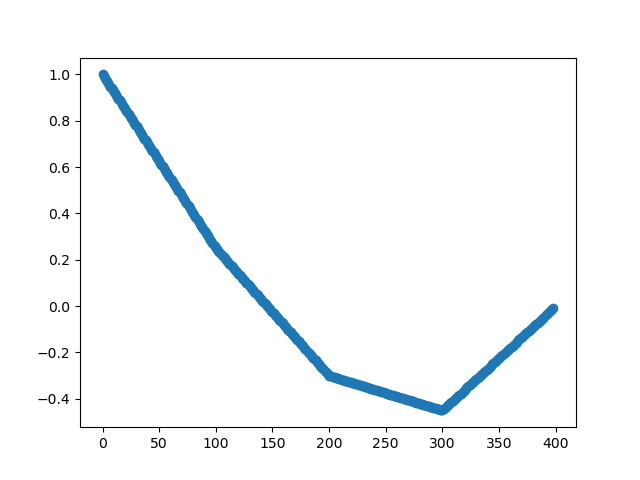

In [143]:
ans=f_autocorr(a1)
plt.figure()
plt.plot(ans,linestyle='',marker='o')
# plt.yscale('log')
plt.show()

In [144]:
f_autocorr_time(ans)

85

https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation

In [108]:

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=np.mean(x)
    var=np.var(x)
    xp=x-mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return np.array(corr)


def autocorr5(x,lags):
    '''numpy.correlate, non partial'''
    mean=x.mean()
    var=np.var(x)
    xp=x-mean
    corr=np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]




In [110]:
autocorr2(a1,np.arange(0,22)), autocorr5(a1,np.arange(0,22))

(array([1.        , 0.96364186, 0.9280256 , 0.89248581, 0.85680737,
        0.82115474, 0.78549431, 0.75050523, 0.71550155, 0.67961459,
        0.64326529, 0.60771943, 0.57173302, 0.53601498, 0.50096325,
        0.46493309, 0.42952199, 0.39341258, 0.35804195, 0.32206176,
        0.28631717, 0.25057141]),
 array([1.        , 0.96364186, 0.9280256 , 0.89248581, 0.85680737,
        0.82115474, 0.78549431, 0.75050523, 0.71550155, 0.67961459,
        0.64326529, 0.60771943, 0.57173302, 0.53601498, 0.50096325,
        0.46493309, 0.42952199, 0.39341258, 0.35804195, 0.32206176,
        0.28631717, 0.25057141]))

In [117]:

def f_autocorr(a1):
    ''' 
    Compute the autocorrelation function of a given 1D array
    '''
    
    lgth=len(a1)
    auto_corr=np.ones(lgth-1,dtype=np.float64)
    
    avg=np.average(a1)
    var=np.var(a1)
    a1=a1-avg

    for t in range(0,lgth-1):
#         auto_corr[t] = (np.average([(a1[i]*a1[i+t]) for i in range(lgth-t)])-avg**2)/var
        auto_corr[t] = (np.sum([(a1[i]*a1[i+t]) for i in range(lgth-t)]))/(var*lgth)
    
    return auto_corr

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=np.mean(x)
    var=np.var(x)
    xp=x-mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return np.array(corr)

autocorr2(a1,np.arange(0,len(a1)-1)),f_autocorr(a1)

(array([ 1.        ,  0.96364186,  0.9280256 ,  0.89248581,  0.85680737,
         0.82115474,  0.78549431,  0.75050523,  0.71550155,  0.67961459,
         0.64326529,  0.60771943,  0.57173302,  0.53601498,  0.50096325,
         0.46493309,  0.42952199,  0.39341258,  0.35804195,  0.32206176,
         0.28631717,  0.25057141,  0.22447083,  0.19840071,  0.17211626,
         0.14559656,  0.11901419,  0.09280314,  0.0662677 ,  0.04043504,
         0.01436363, -0.01219211, -0.03868778, -0.06503611, -0.0912113 ,
        -0.11696983, -0.14292947, -0.16918416, -0.19553158, -0.2219127 ,
        -0.24822744, -0.27450911, -0.30091563, -0.3079406 , -0.31506224,
        -0.32226218, -0.32910481, -0.33637177, -0.34332035, -0.35078263,
        -0.35776897, -0.36492759, -0.37215442, -0.37901436, -0.38630543,
        -0.39366947, -0.40054091, -0.40704995, -0.41412322, -0.4209907 ,
        -0.42789283, -0.43488738, -0.44205708, -0.4495887 , -0.4281906 ,
        -0.40693029, -0.38563739, -0.36411963, -0.3

In [132]:
%timeit autocorr2(a1,np.arange(0,len(a1)-1))

%timeit f_autocorr(a1)

5.19 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.3 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [177]:
def f_autocorr(a1):
    ''' 
    Compute the autocorrelation function of a given 1D array
    '''
    
    lgth=len(a1)
    
    auto_corr=np.ones(lgth-1,dtype=np.float64)
    
    avg=np.average(a1)
    var=np.var(a1)
    
    # Deviation from the mean
    a2=a1-avg

    mode=2
    
    if mode==1: # Simple method, slower
        
        for t in range(0,lgth-1):
            auto_corr[t] = (np.sum([(a2[i]*a2[i+t]) for i in range(lgth-t)]))/(var*lgth)
        
    elif mode==2: # Faster method with numpy array
        
        auto_corr=np.array([1. if l==0 else np.mean(a2[l:]*a2[:-l])/(var) for l in range(0,lgth-1)])

    return auto_corr


def f_autocorr_time(a1):
    '''
    Compute autocorrelation array and then compute autocorrelation time as epoch to attain (1/e) th value
    '''
    
    # Compute autocorr array
    auto_corr=f_autocorr(a1)
    
    ## Autocorrelation time as 1/e of 0th value
    for count,i in enumerate(auto_corr):
        if i < (1.0/np.e):
#             print("Autocorr",count,i)
            return count

    print("Error: Autocorr doesn't drop to 1/e")
    return np.inf


In [178]:
a1=np.array([np.random.normal(i,0.05,49) for i in range(1,16,4)]).flatten()
# a1=np.random.normal(1,0.05,25)


In [179]:
ans=f_autocorr(a1)
f_autocorr_time(ans)
# ans

50